In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("./co2_emission.csv")
data

,Entity,Code,Year,Annual CO₂ emissions (tonnes )
0,Afghanistan,AFG,1949,14656.00
1,Afghanistan,AFG,1950,84272.00
2,Afghanistan,AFG,1951,91600.00
3,Afghanistan,AFG,1952,91600.00
4,Afghanistan,AFG,1953,106256.00
...,...,...,...,...
20848,Zimbabwe,ZWE,2013,11536239.29
20849,Zimbabwe,ZWE,2014,11866348.41
20850,Zimbabwe,ZWE,2015,10907603.94
20851,Zimbabwe,ZWE,2016,9932649.88


In [3]:
data.head(1)


,Entity,Code,Year,Annual CO₂ emissions (tonnes )
0,Afghanistan,AFG,1949,14656.0


In [4]:
data.describe()

,Year,Annual CO₂ emissions (tonnes )
count,20853.000000,2.085300e+04
mean,1953.339424,1.930517e+08
std,57.903089,1.345143e+09
min,1751.000000,-6.255223e+08
25%,1932.000000,3.187680e+05
50%,1971.000000,3.828880e+06
75%,1995.000000,3.706898e+07
max,2017.000000,3.615326e+10


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20853 entries, 0 to 20852
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Entity                          20853 non-null  object 
 1   Code                            18646 non-null  object 
 2   Year                            20853 non-null  int64  
 3   Annual CO₂ emissions (tonnes )  20853 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 651.8+ KB


In [6]:
data.isna().sum()

Entity                               0
Code                              2207
Year                                 0
Annual CO₂ emissions (tonnes )       0
dtype: int64

In [7]:
cleaned_data=data.drop(columns=['Code'])
cleaned_data

,Entity,Year,Annual CO₂ emissions (tonnes )
0,Afghanistan,1949,14656.00
1,Afghanistan,1950,84272.00
2,Afghanistan,1951,91600.00
3,Afghanistan,1952,91600.00
4,Afghanistan,1953,106256.00
...,...,...,...
20848,Zimbabwe,2013,11536239.29
20849,Zimbabwe,2014,11866348.41
20850,Zimbabwe,2015,10907603.94
20851,Zimbabwe,2016,9932649.88


<Axes: xlabel='Year', ylabel='Annual CO₂ emissions (tonnes )'>

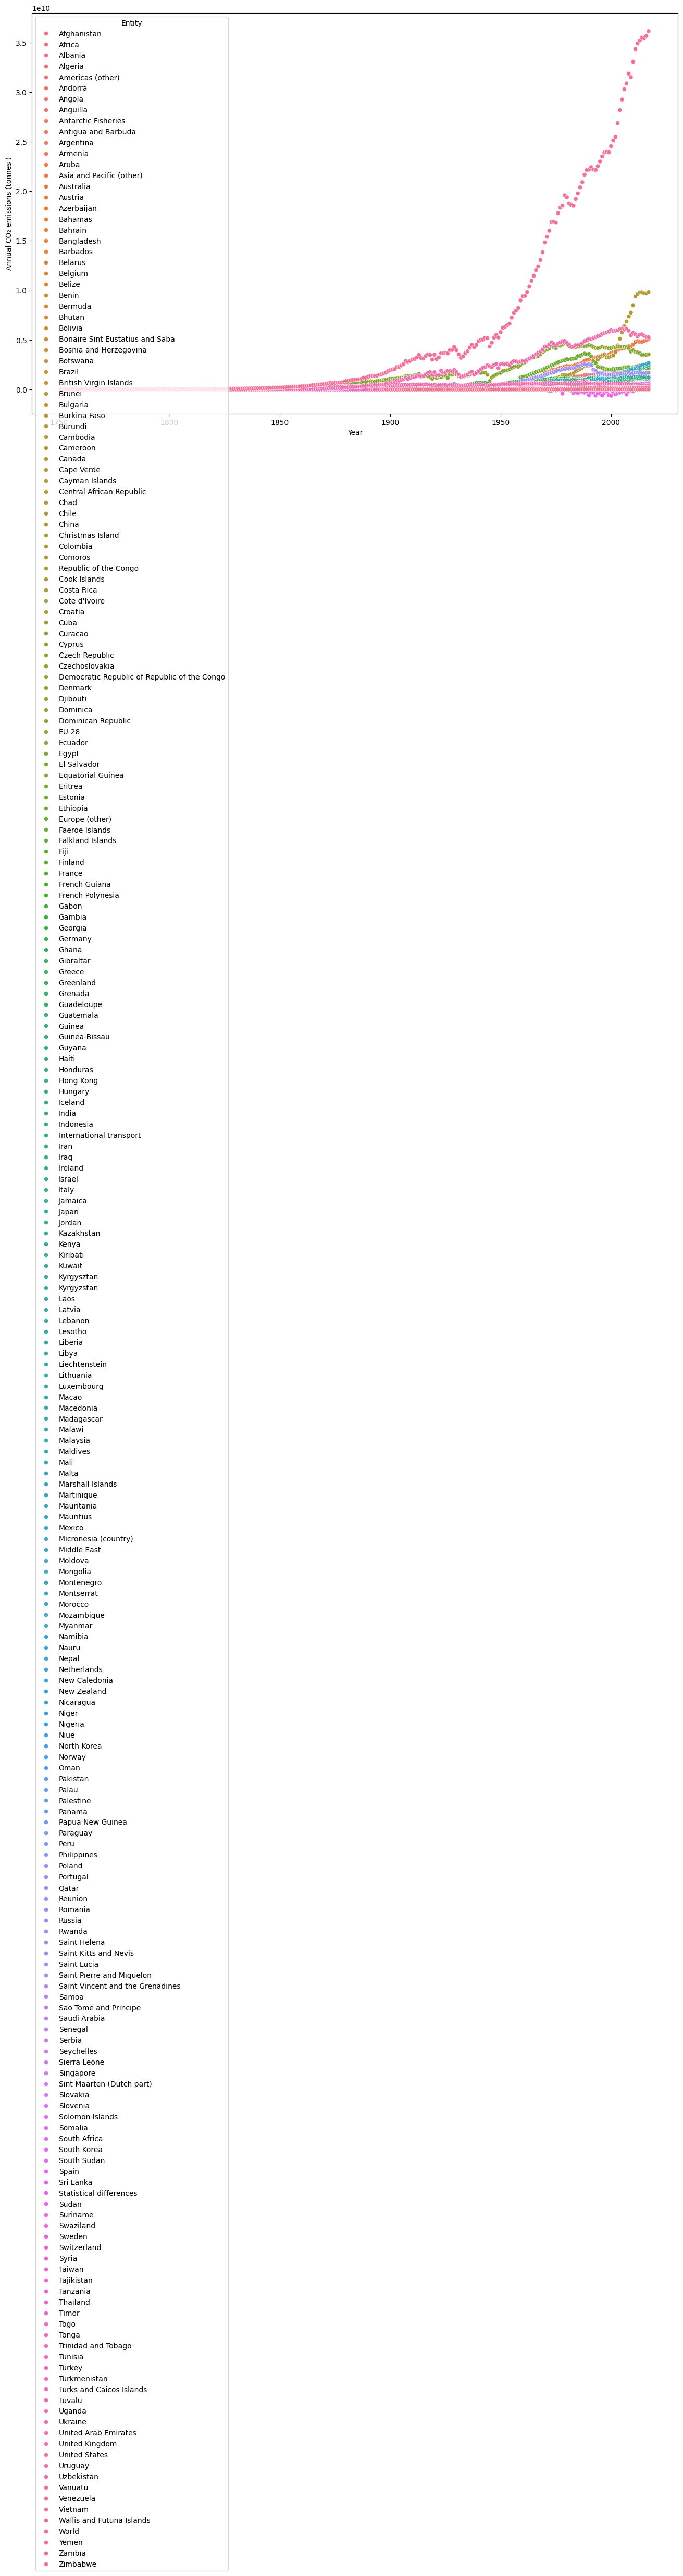

In [8]:
plt.figure(figsize=(16,10))
sns.scatterplot(data=cleaned_data,x="Year",y="Annual CO₂ emissions (tonnes )",hue="Entity")

In [9]:
Co2_emssion=cleaned_data.groupby('Entity')["Annual CO₂ emissions (tonnes )"].sum().sort_values(ascending=False).reset_index(name="CO2")
Co2_emssion=Co2_emssion.iloc[1:11]
Co2_emssion

,Entity,CO2
1,United States,3.993783e+11
2,EU-28,3.528583e+11
3,China,2.001365e+11
4,Asia and Pacific (other),1.780573e+11
5,Europe (other),1.575402e+11
6,Russia,1.005891e+11
7,Americas (other),9.864116e+10
8,Germany,9.056563e+10
9,United Kingdom,7.707106e+10
10,Japan,6.230461e+10


<Axes: xlabel='Entity', ylabel='CO2'>

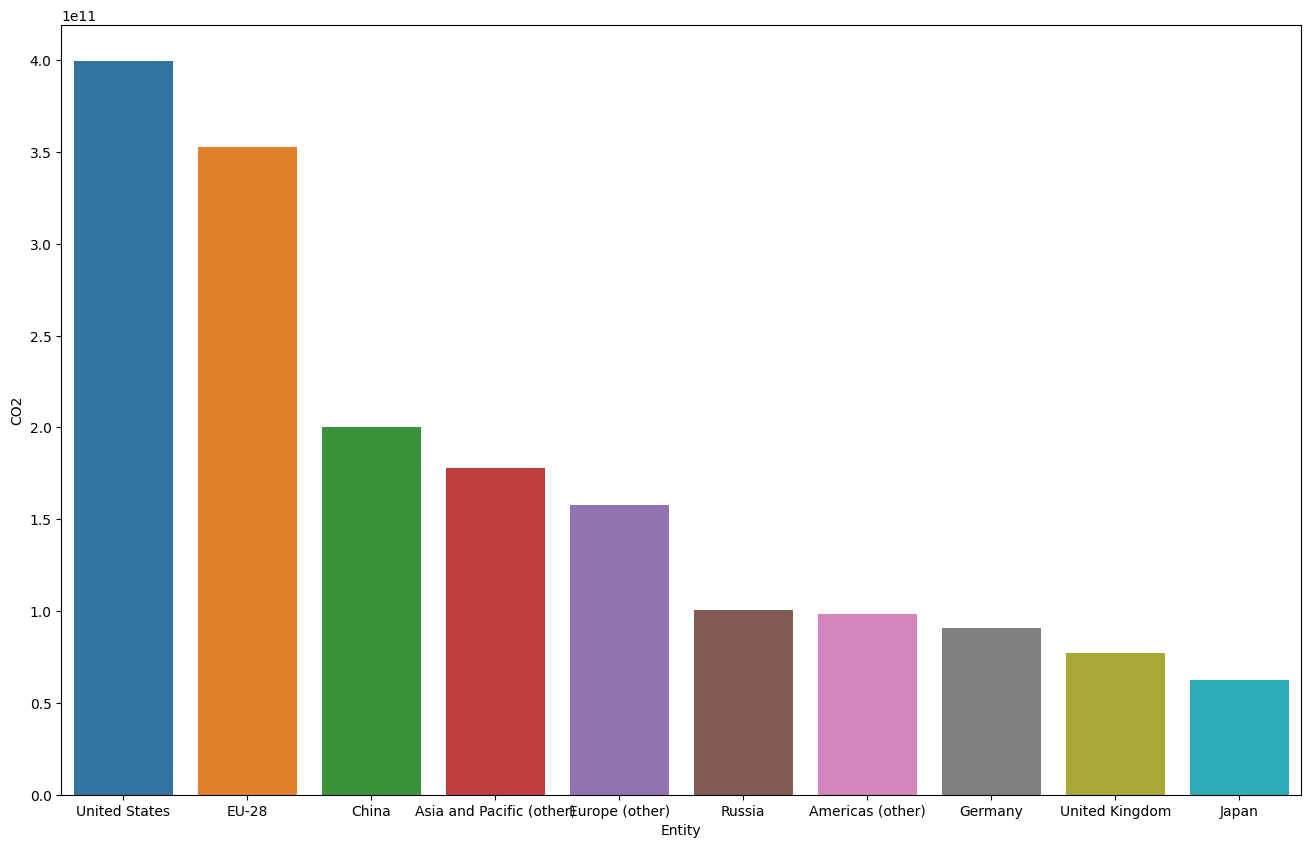

In [10]:
plt.figure(figsize=(16,10))
sns.barplot(data=Co2_emssion,x=Co2_emssion["Entity"],y=Co2_emssion["CO2"],hue="Entity")

Text(0.5, 1.0, 'Emission by Entity')

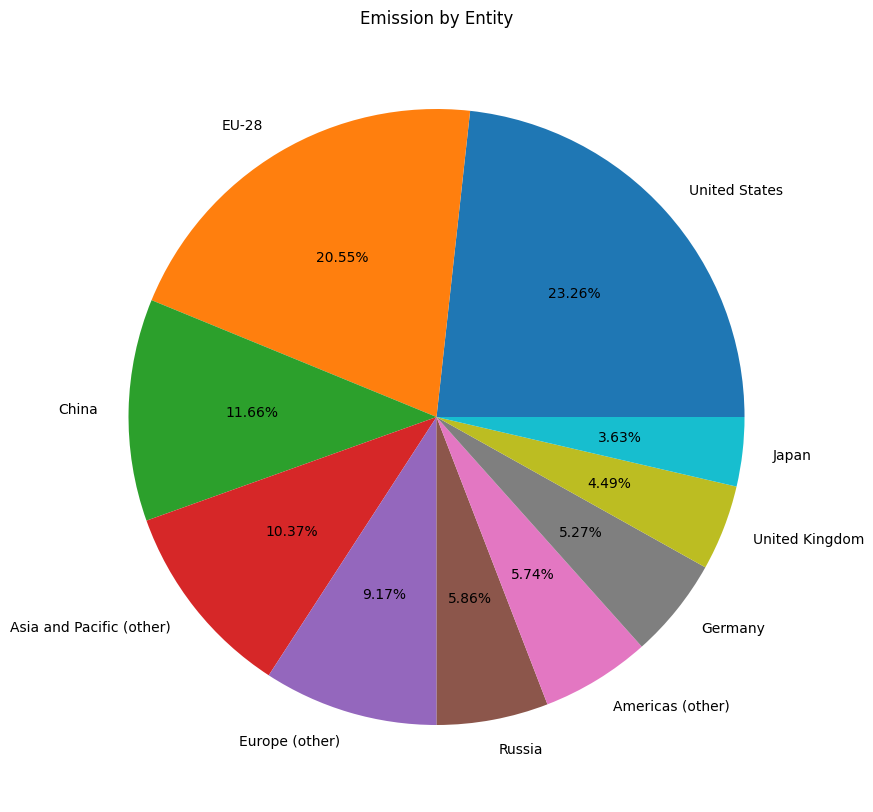

In [11]:
plt.figure(figsize=(16,10))
plt.pie(Co2_emssion["CO2"],labels=Co2_emssion["Entity"],autopct='%1.2f%%')
plt.title("Emission by Entity")

In [12]:
data.head(1)

,Entity,Code,Year,Annual CO₂ emissions (tonnes )
0,Afghanistan,AFG,1949,14656.0


In [13]:
x=data[["Year"]]
y=data[["Annual CO₂ emissions (tonnes )"]]

In [14]:
from sklearn.model_selection import train_test_split
from  sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor


In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [16]:
model=LinearRegression()
model.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [17]:
y_pred=model.predict(x_test)

In [18]:
mse=mean_squared_error(y_test,y_pred)
score=r2_score(y_test,y_pred)

In [19]:
print(f'mse : {mse}')
print(f"score : {score}")

mse : 1.2179942720829455e+18
score : 0.002686775428039967
